**Created by Sanskar Hasija**

**AI4Code Detailed EDA📊**

**12 May 2021**


  # <center> <span style="color:#00BFC4;"> AI4CODE DETAILED EDA📊</span> </center>
## <center><span style="color:#00BFC4;">If you find this notebook useful, support with an upvote👍</span></center>

# <center><span style="color:#e76f51;">Table of Contents</span>
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. EDA](#3)
    - [3.1 Train Data](#3.1)
        - [3.1.1 Train Data Distribution ](#3.1.1)
    - [3.2 Code Cell Analysis](#3.2)
        - [3.2.1 Code Cells Length Distribution ](#3.2.1)
        - [3.2.2 Code Cells WordCloud ](#3.2.2)
    - [3.3 Markdown Cell Analysis](#3.2)
        - [3.3.1 Markdown Cells Length Distribution ](#3.3.1)
        - [3.3.2 Markdown Cells WordCloud ](#3.3.2)

<a id="1"></a>
# **<center><span style="color:#00BFC4;">Introduction </span></center>**

### <center>[AI4Code](https://www.kaggle.com/competitions/AI4Code)</center>

![](https://raw.githubusercontent.com/sanskar-hasija/kaggle/main/images/ai4code_image.png)

<b>The goal of this competition is to understand the relationship between code and comments in Python notebooks. You are challenged to reconstruct the order of markdown cells in a given notebook based on the order of the code cells, demonstrating comprehension of which natural language references which code.</b>

<b>Predictions are evaluated by the Kendall tau correlation between predicted cell orders and ground truth cell orders accumulated across the entire collection of test set notebooks.</b>

<b>Check more about Kendall tau correlation [here](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient).</b>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#00BFC4;">IMPORTS </span></center>**

In [1]:
import os
import json
import wordcloud
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## <span style="color:#e76f51;"> Loading Data : </span>


Pandas Dataframe used is created by [Darien Schettler](https://www.kaggle.com/dschettler8845). Link to dataset - https://www.kaggle.com/datasets/dschettler8845/ai4code-train-dataframe

In [2]:
## train dataframes
df = pd.read_csv("../input/ai4code-train-dataframe/train.csv", index_col= [1,2])
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.dropna(inplace = True)

df_ancestors = pd.read_csv('../input/AI4Code/train_ancestors.csv', index_col='id')
df_orders = pd.read_csv("../input/AI4Code/train_orders.csv",index_col='id',squeeze=True,).str.split()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#00BFC4;">EDA</span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations:</u></b><br>

* <i> A total of <b><u>139256</u></b> notebooks are provided <b><u>train</u></b> set.</i><br>
* <i> A total of <b><u>4</u></b> notebooks are provided <b><u>test</u></b> set. This will be replaced with a <b><u> hidden test</u></b> set for scoring</i><br>
* <i> There are total of <b><u>146300</u></b> cells in <b><u>train </u></b>the train dataframe constructed which include two types of cell_type.</i><br>
* <i> Two types of cell_type - <b><u>code</u></b> and <b><u>markdown</u></b>.
* <i> Almost 2/3rd of the training data consist of Code Cells and remaining 1/3rd consist of Markdown Cells</u></b>.

In [3]:
print(f"\033[94mNumber of notebooks present in train set  = ",len(os.listdir("../input/AI4Code/train")))
print(f"\033[94mNumber of notebooks present in test set  = ",len(os.listdir("../input/AI4Code/test")))

Number of notebooks present in train set  =  139256
Number of notebooks present in test set  =  4


<a id="3.1"></a>
### <span style="color:#e76f51;"> Quick View of train data  : </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>`df` is a Multi-level indexing Padnas Dataframe with 2 index - id and cell_id. </b><br>
Learn more about Multi-level indexing Padnas Dataframe - https://pandas.pydata.org/docs/user_guide/advanced.html
</div>


In [4]:
df.head()

cell_type  \
id             cell_id              
8a2564b730a575 8395ab7c      code   
               ebc844d6      code   
               49251f17      code   
               3a6623e3      code   
               24e09d1a      code   

                                                                    source  
id             cell_id                                                      
8a2564b730a575 8395ab7c  import numpy as np\nimport matplotlib.pyplot a...  
               ebc844d6  df_train = pd.read_csv('../input/tensorflow-gr...  
               49251f17  def bbox_inv_iou(boxA, boxB):\n    """Copied f...  
               3a6623e3  test_sequence_id = np.unique(df_train.sequence...  
               24e09d1a  seq_df_with_cots_ids, stats = find_unique_cots...

<a id="3.1.1"></a>
### <span style="color:#e76f51;"> Train data distribution  : </span>

In [5]:
code_df = df[df["cell_type"] == "code"]
mkd_df = df[df["cell_type"] == "markdown"]


print(f'\033[94mNumber of Code Cells: {len(code_df)}')
print(f'\033[94mNumber of Markdown Cells: {len(mkd_df)}')

labels=['Code Cells', 'Markdown Cells']
values= [len(code_df), len(mkd_df)]
colors = ['#DE3163', '#58D68D']

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, 
    pull=[0.1, 0 ],
    marker=dict(colors=colors, 
                line=dict(color='#000000', 
                          width=2))
)])
fig.show()

Number of Code Cells: 4204578
Number of Markdown Cells: 2166064


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3.2"></a>
## <span style="color:#e76f51;"> Code cells analysis  : </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations:</u></b><br>

* <i> Mean Length for Code Cells is <b><u>25 words</u></b>
* <i> Max words in a Code Cell is <b><u>74589 words</u></b>
* <i> There are many outliers in Code Cells

### <span style="color:#e76f51;"> Sample Code Cell: </span>

In [6]:
print(f'\033[94m')
print(code_df.iloc[0]["source"])


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import uuid
import os
import scipy
import cv2
from tqdm import tqdm
import math
import ast
sns.set()


<a id="3.2.1"></a>
### <span style="color:#e76f51;"> Code cells Length Distribution  : </span>

In [7]:
code_lengths = np.array([len(code_df["source"][i].split()) for i in range(len(code_df))])
print(f'\033[94m Min Code Cells Length = ', min(code_lengths))
print(f'\033[94m Mean Code cells Length = ', round(np.mean(code_lengths),2))
print(f'\033[94m Max Code Cells Length = ', max(code_lengths))

 Min Code Cells Length =  1
 Mean Code cells Length =  25.24
 Max Code Cells Length =  74589


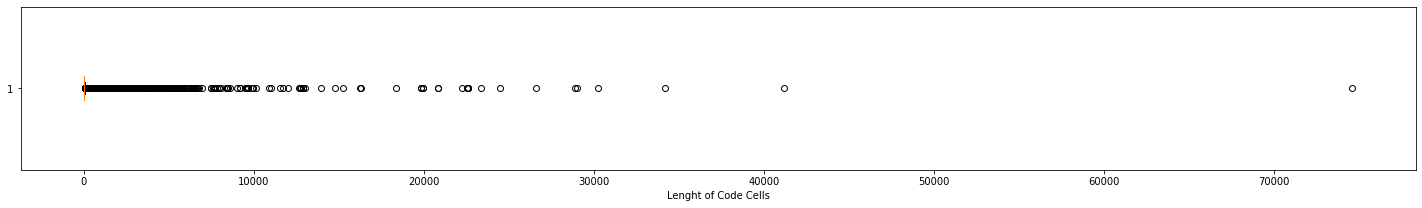

In [8]:
fig,ax= plt.subplots(figsize= (25,3))
plt.boxplot(code_lengths, vert = False)
plt.xlabel("Lenght of Code Cells");

<a id="3.2.2"></a>
### <span style="color:#e76f51;"> Code cells WordCloud  : </span>

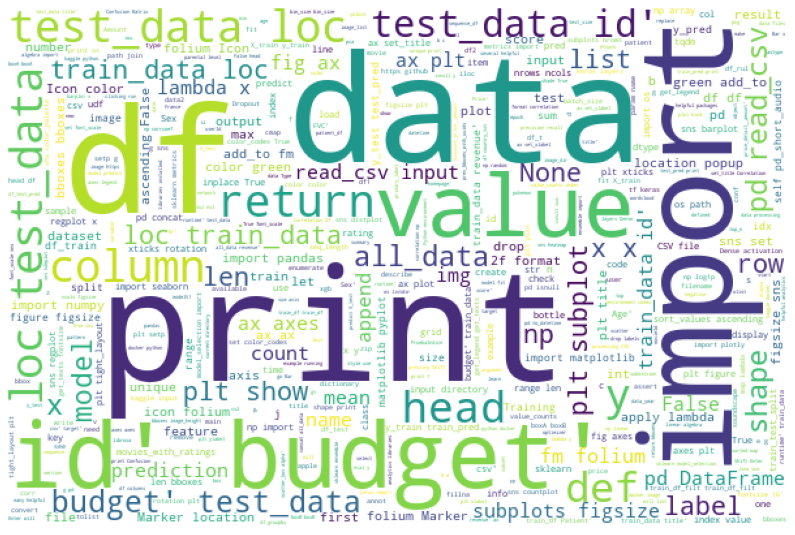

In [9]:
wordcloud_notes = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=120, max_words=5000,
                      width = 600, height = 400,
                      background_color='white').generate("".join(code_df["source"][:1000]))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud_notes, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_notes);

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

## <span style="color:#e76f51;"> Markdown cells analysis  : </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations:</u></b><br>

* <i> Mean Length for Markdown Cells is <b><u>29 words</u></b>
* <i> Max words in a Markdown Cell is <b><u>38939 words</u></b>
* <i> There are many outliers in Markdown Cells as well.

### <span style="color:#e76f51;"> Sample Markdown Cell: </span>

In [10]:
print(f'\033[94m')
print(mkd_df.iloc[59]["source"])


### Pipeline 

At this stage, it is worth introducing pipeline. In machine learning, it is common to run a sequence of algorithms to process and learn from data. In our example, we performed StringIndexer, VectorAssembler, and ML model. In other cases, the intermediate stages can be standardization, vectorization (for text processing), normalization, etc. These operations have to be performed on a specific order. Spark represents such a workflow as a Pipeline, which consists of a sequence of stages to be run in a specific order. Pipeline chains multiple Transformers and Estimators together to specify an ML workflow. 

Without the pipeline, we have to execute each stage, store the outcome, and feed into the next stage and evaluate, and so on. We prefer pipeline over this manual approach because of the following reasons: 

- The pipeline is less prone to mistake because the processes are automated. 
- In a production environment, this is the only way to do machine learning end to end. 


<a id="3.3.1"></a>
### <span style="color:#e76f51;"> Markdown Cells Length Distribution  : </span>

In [11]:
mkd_lengths = np.array([len(mkd_df ["source"][i].split()) for i in range(len(mkd_df))])
print(f'\033[94m Min Markdown Cells Length = ', min(mkd_lengths))
print(f'\033[94m Mean Markdown cells Length = ', round(np.mean(mkd_lengths),2))
print(f'\033[94m Max Markdown Cells Length = ', max(mkd_lengths))

 Min Markdown Cells Length =  1
 Mean Markdown cells Length =  29.42
 Max Markdown Cells Length =  38939


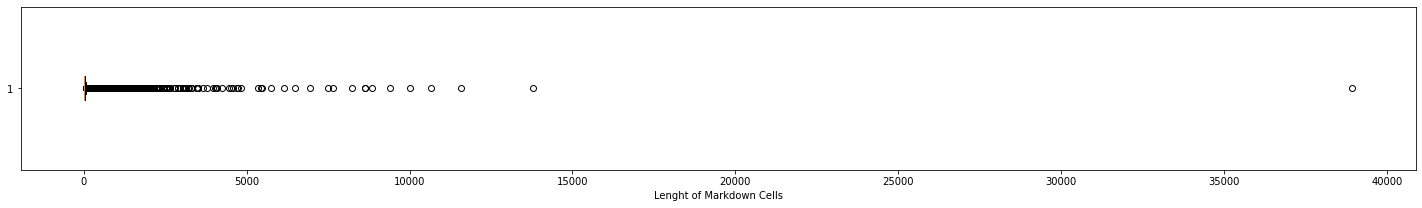

In [12]:
fig,ax= plt.subplots(figsize= (25,3))
plt.boxplot(mkd_lengths, vert = False)
plt.xlabel("Lenght of Markdown Cells");

<a id="3.3.3"></a>
### <span style="color:#e76f51;"> Markdown Cells WordCloud  : </span>

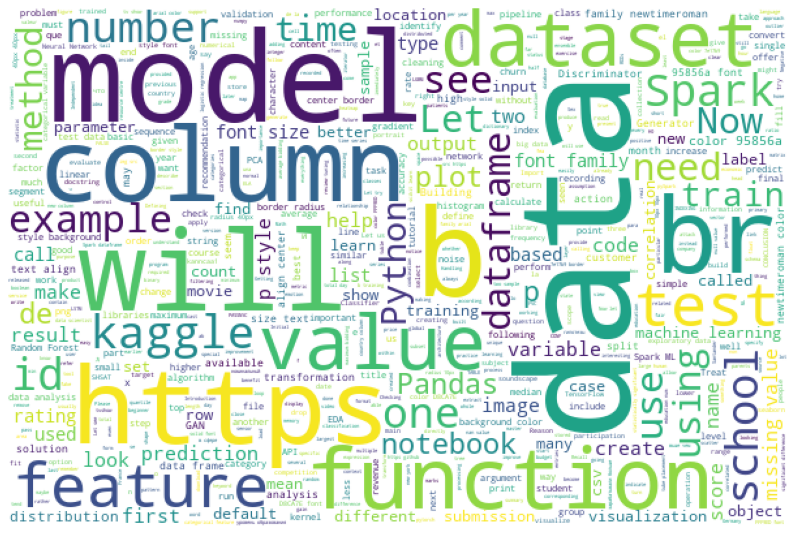

In [13]:
wordcloud_notes = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=120, max_words=5000,
                      width = 600, height = 400,
                      background_color='white').generate("".join(mkd_df["source"][:1000]))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud_notes, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_notes);

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

# <center>WORK IN PROGRESS 🙂</center>